# 1. Get all folder name and details.

In [2]:
# Main
import os 
cur_path=os.getcwd()
print(cur_path)
File_dir_path=cur_path
file_dir=os.listdir(path=File_dir_path)
print(f"All files : {file_dir}")
csv_files=[i for i in file_dir if str(i).endswith(".csv") and " Copy" not in str(i)]
print(f"csv_files : {csv_files}")
exl_files=[i for i in file_dir if str(i).endswith(".xlsx") and " Copy" not in str(i)]
print(f"Excel_files : {exl_files}")

c:\Users\KIIT\Desktop\GitHUB\CollegeProjects\InHouse Projects\ML-DL_SelfProjects\ML Model Build Automation
All files : ['.gitkeep', 'AutoModelBuilding - Copy - Copy.ipynb', 'AutoModelBuilding - Copy.ipynb', 'AutoModelBuilding.ipynb', 'Employee_attrition - Copy.csv', 'Employee_attrition.csv', 'Income&Expenditure - Copy.csv', 'Income&Expenditure - Copy.xlsx', 'Income&Expenditure.csv', 'Income&Expenditure.xlsx']
csv_files : ['Employee_attrition.csv', 'Income&Expenditure.csv']
Excel_files : ['Income&Expenditure.xlsx']


# 2. Read excel and convert to csv

In [3]:
#Main
import pandas as pd
d=dict()
for i in exl_files:
    exl_data=pd.read_excel(i)
    exl_data.to_csv(i[:-5]+".csv")
    d.update({i[:-5]+".csv":True})
file_dir=os.listdir(path=File_dir_path)

print(File_dir_path)
print(file_dir)



c:\Users\KIIT\Desktop\GitHUB\CollegeProjects\InHouse Projects\ML-DL_SelfProjects\ML Model Build Automation
['.gitkeep', 'AutoModelBuilding - Copy - Copy.ipynb', 'AutoModelBuilding - Copy.ipynb', 'AutoModelBuilding.ipynb', 'Employee_attrition - Copy.csv', 'Employee_attrition.csv', 'Income&Expenditure - Copy.csv', 'Income&Expenditure - Copy.xlsx', 'Income&Expenditure.csv', 'Income&Expenditure.xlsx']


In [4]:
for i in range(len(csv_files)):
    print(f"Press {i+1} for selecting {csv_files[i]}")
print(f"User Choise : ",end="")
ch=1 #int(input("User Choice : "))
print(ch)
def f():
    if csv_files[ch-1] in d.keys():
        data=pd.read_csv(csv_files[ch-1]).iloc[:,2:]
    else:
        data=pd.read_csv(csv_files[ch-1]).iloc[:,1:]
    return data

Press 1 for selecting Employee_attrition.csv
Press 2 for selecting Income&Expenditure.csv
User Choise : 1


In [5]:
data=f()
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


# 3. Decalare ML Model 

In [6]:
Reg_model_flag=None
if len(data.iloc[:,-1].unique())>2:
    print("Regression model to be applied")
    Reg_model_flag="regression"

elif len(data.iloc[:,-1].unique())==2:
    print("Classification model to be applied")
    Reg_model_flag="classification"
    
else:
    pass

Classification model to be applied


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
model_linearRegression=LinearRegression()
model_SVRegression=SVR()
model_DTRegression=DecisionTreeRegressor()
model_RFRegression=RandomForestRegressor()
model_regression={"Linear Regression":model_linearRegression,
                  "SVM Regression":model_SVRegression,
                  "DecisionTree Regression":model_DTRegression,
                  "Randomforest Regression":model_RFRegression}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_logsClassify=LogisticRegression()
model_SVClassify=SVC()
model_DTClassify=DecisionTreeClassifier()
model_RFClassify=RandomForestClassifier()
model_Classify={"Logistic Regression":model_logsClassify,
                "SVM Classification":model_SVClassify,
                "DecisionTree Classification":model_DTClassify,
                "Randomforest Classification":model_RFClassify}

In [8]:
for model_name,model in model_regression.items():
    print(model_name,end=" : ")
    print(model)
print()
for model_name,model in model_Classify.items():
    print(model_name,end=" : ")
    print(model)

Linear Regression : LinearRegression()
SVM Regression : SVR()
DecisionTree Regression : DecisionTreeRegressor()
Randomforest Regression : RandomForestRegressor()

Logistic Regression : LogisticRegression()
SVM Classification : SVC()
DecisionTree Classification : DecisionTreeClassifier()
Randomforest Classification : RandomForestClassifier()


# EDA(Explanatory Data Analysis)

In [9]:
data.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

# Data Cleaning - Outliers, Null values

In [10]:
data.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Years at Company          59598 non-null  int64 
 3   Job Role                  59598 non-null  object
 4   Monthly Income            59598 non-null  int64 
 5   Work-Life Balance         59598 non-null  object
 6   Job Satisfaction          59598 non-null  object
 7   Performance Rating        59598 non-null  object
 8   Number of Promotions      59598 non-null  int64 
 9   Overtime                  59598 non-null  object
 10  Distance from Home        59598 non-null  int64 
 11  Education Level           59598 non-null  object
 12  Marital Status            59598 non-null  object
 13  Number of Dependents      59598 non-null  int64 
 14  Job Level             

In [12]:
if "Date" in data.columns:
    data.set_index("Date",inplace=True)
data

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,Female,12,Education,4414,Fair,High,Average,1,Yes,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,18,Male,4,Healthcare,8040,Fair,High,High,3,No,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,22,Female,14,Technology,7944,Fair,High,High,0,Yes,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,23,Male,8,Education,2931,Fair,Very High,Average,0,No,...,0,Entry,Large,9,No,No,No,Good,Low,Left


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj_col=list(data.columns[data.dtypes=="object"])#[1:]
print(obj_col)
for i in obj_col:
    data[i]=le.fit_transform(data[i])
data

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2,0,...,0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3,0,...,3,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0,0,...,3,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1,0,...,2,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0,1,...,0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,0,12,0,4414,1,0,0,1,1,...,2,2,2,35,0,0,1,3,3,0
59594,18,1,4,2,8040,1,0,2,3,0,...,0,2,1,73,0,0,0,1,2,0
59595,22,0,14,4,7944,1,0,2,0,1,...,2,0,2,29,0,1,0,2,2,1
59596,23,1,8,0,2931,1,3,0,0,0,...,0,0,0,9,0,0,0,2,1,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       59598 non-null  int64
 1   Gender                    59598 non-null  int32
 2   Years at Company          59598 non-null  int64
 3   Job Role                  59598 non-null  int32
 4   Monthly Income            59598 non-null  int64
 5   Work-Life Balance         59598 non-null  int32
 6   Job Satisfaction          59598 non-null  int32
 7   Performance Rating        59598 non-null  int32
 8   Number of Promotions      59598 non-null  int64
 9   Overtime                  59598 non-null  int32
 10  Distance from Home        59598 non-null  int64
 11  Education Level           59598 non-null  int32
 12  Marital Status            59598 non-null  int32
 13  Number of Dependents      59598 non-null  int64
 14  Job Level                 59598 non-nu

# Handling Outliers

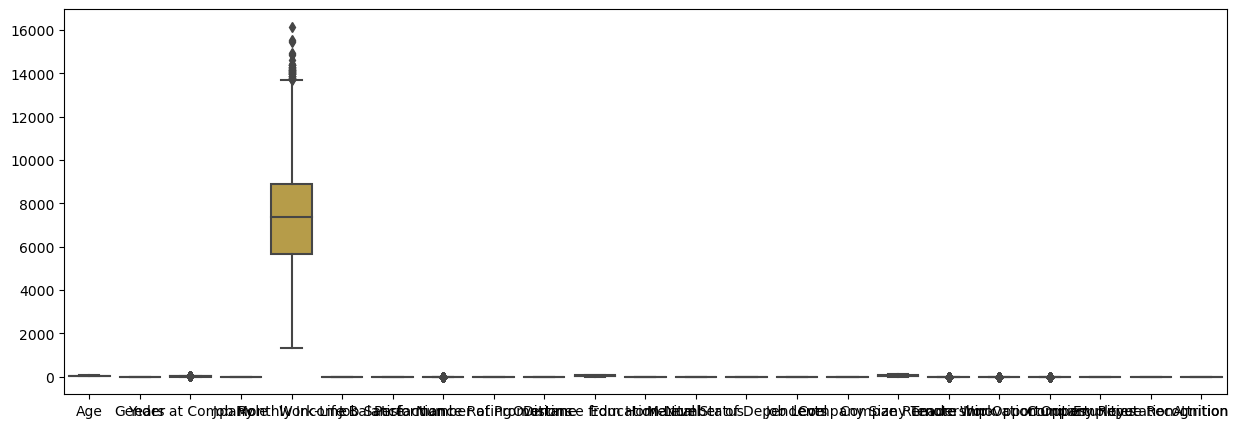

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       59598 non-null  int64
 1   Gender                    59598 non-null  int32
 2   Years at Company          59598 non-null  int64
 3   Job Role                  59598 non-null  int32
 4   Monthly Income            59598 non-null  int64
 5   Work-Life Balance         59598 non-null  int32
 6   Job Satisfaction          59598 non-null  int32
 7   Performance Rating        59598 non-null  int32
 8   Number of Promotions      59598 non-null  int64
 9   Overtime                  59598 non-null  int32
 10  Distance from Home        59598 non-null  int64
 11  Education Level           59598 non-null  int32
 12  Marital Status            59598 non-null  int32
 13  Number of Dependents      59598 non-null  int64
 14  Job Level                 59598 non-nu

['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


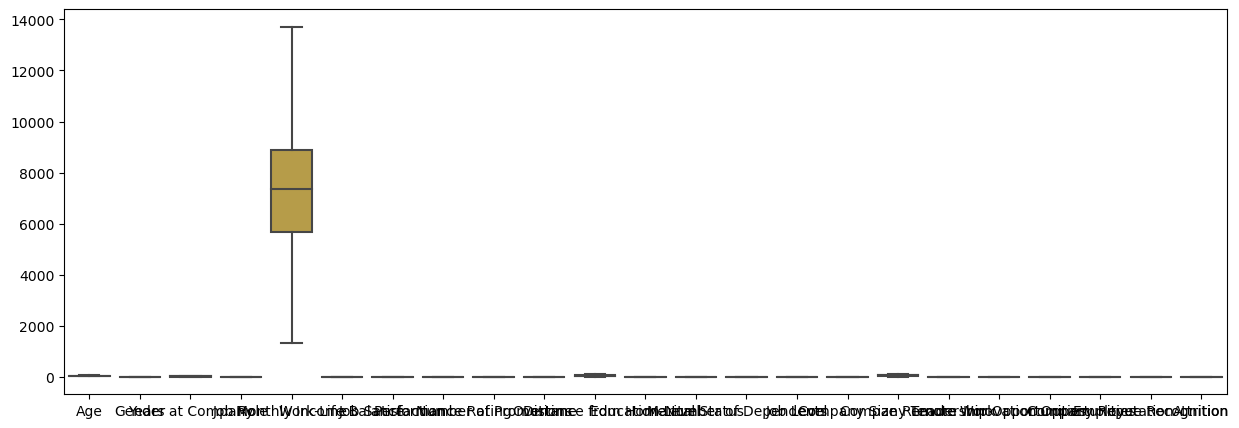

In [17]:
def outlier(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    data.loc[data[i]<lb,i]=lb
    data.loc[data[i]>ub,i]=ub
print(list(data.columns))
for i in list(data.columns):
    outlier(i)

plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.show()

In [18]:
#sns.pairplot(data)
plt.show()

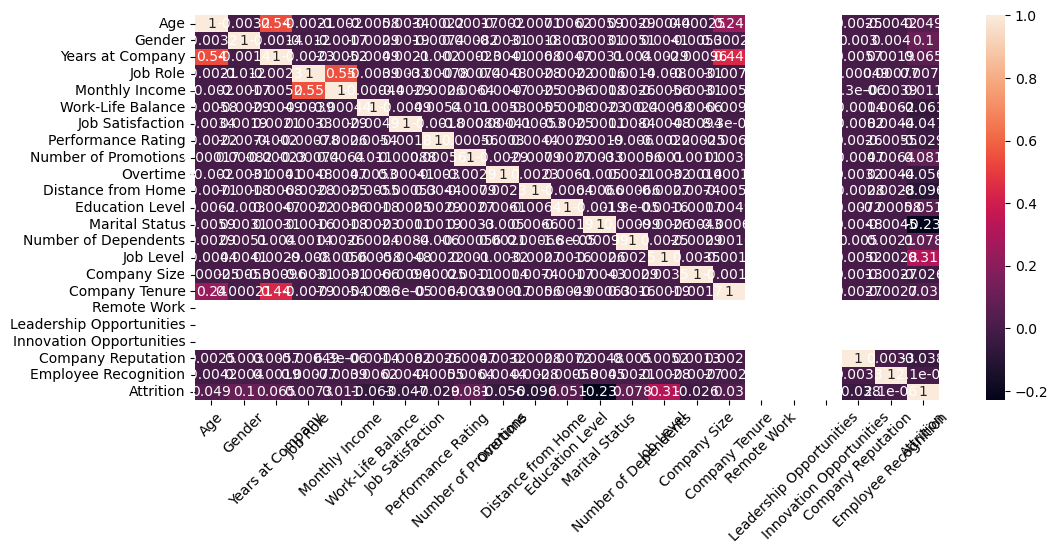

In [19]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[12,5])
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.show()

In [20]:
print(data.columns)
if "Date" in data.columns:
    x=data.iloc[:,:-1].drop(columns=["Date"])
if "Cumulative Saving" in data.columns:
    x=data.iloc[:,:-1].drop(columns=["Cumulative Saving"])
else:
    x=data.iloc[:,:-1]
    
y=data.iloc[:,-1]
data.reset_index(inplace=True)
data.head()

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


,index,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0,31.0,1.0,19,0.0,5390,0.0,2,0.0,2,...,0.0,1.0,1.0,89,0,0,0,0.0,2.0,1.0
1,1,59.0,0.0,4,3.0,5534,3.0,0,2.5,3,...,3.0,1.0,1.0,21,0,0,0,1.0,1.0,1.0
2,2,24.0,0.0,10,2.0,8159,2.0,0,2.5,0,...,3.0,1.0,1.0,74,0,0,0,3.0,1.0,1.0
3,3,36.0,0.0,7,0.0,3989,2.0,0,2.0,1,...,2.0,1.0,2.0,50,0,0,0,2.0,2.0,1.0
4,4,56.0,1.0,41,0.0,4821,1.0,3,0.0,0,...,0.0,2.0,1.0,68,0,0,0,1.0,2.0,1.0


In [21]:
len(x)

59598

In [22]:
len(y)

59598

In [23]:
len(data)

59598

In [24]:
x

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,31.0,1.0,19,0.0,5390,0.0,2,0.0,2,0.0,...,1.0,0.0,1.0,1.0,89,0,0,0,0.0,2.0
1,59.0,0.0,4,3.0,5534,3.0,0,2.5,3,0.0,...,0.0,3.0,1.0,1.0,21,0,0,0,1.0,1.0
2,24.0,0.0,10,2.0,8159,2.0,0,2.5,0,0.0,...,1.0,3.0,1.0,1.0,74,0,0,0,3.0,1.0
3,36.0,0.0,7,0.0,3989,2.0,0,2.0,1,0.0,...,2.0,2.0,1.0,2.0,50,0,0,0,2.0,2.0
4,56.0,1.0,41,0.0,4821,1.0,3,0.0,0,1.0,...,0.0,0.0,2.0,1.0,68,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50.0,0.0,12,0.0,4414,1.0,0,0.0,1,1.0,...,2.0,2.0,2.0,2.0,35,0,0,0,3.0,3.0
59594,18.0,1.0,4,2.0,8040,1.0,0,2.0,3,0.0,...,2.0,0.0,2.0,1.0,73,0,0,0,1.0,2.0
59595,22.0,0.0,14,4.0,7944,1.0,0,2.0,0,1.0,...,1.0,2.0,0.0,2.0,29,0,0,0,2.0,2.0
59596,23.0,1.0,8,0.0,2931,1.0,3,0.0,0,0.0,...,2.0,0.0,0.0,0.0,9,0,0,0,2.0,1.0


In [25]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59593    0.0
59594    0.0
59595    1.0
59596    0.0
59597    1.0
Name: Attrition, Length: 59598, dtype: float64

# Model Building

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Logistic Regression : LogisticRegression()
Training score :  0.6879284721223453
Testing score :  0.6829977628635346
Mean absolute error :  0.3170022371364653
Mean squared error :  0.3170022371364653
Root mean squared error :  0.5630295171094188
R2 score :  -0.27051439754569073


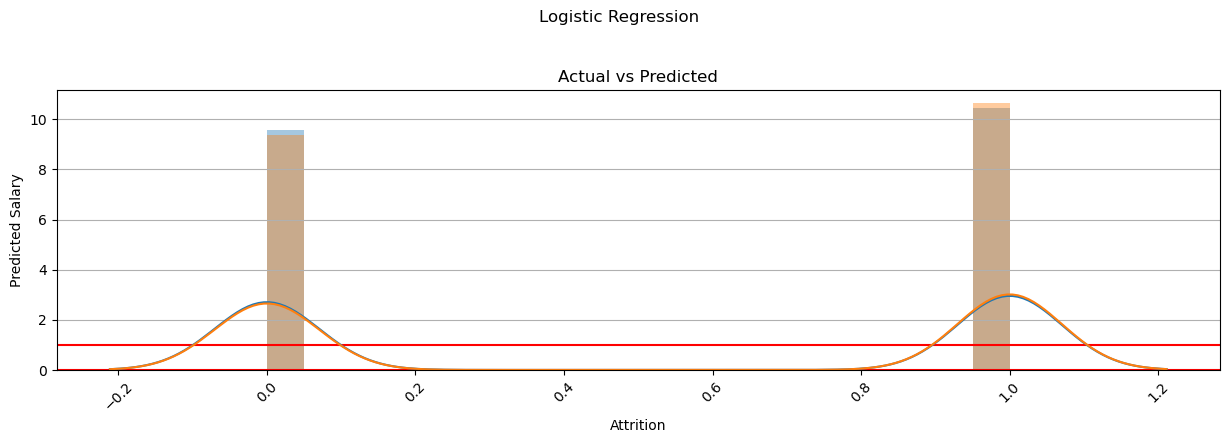

SVM Classification : SVC()
Training score :  0.7549738721894625
Testing score :  0.7106263982102908
Mean absolute error :  0.28937360178970917
Mean squared error :  0.28937360178970917
Root mean squared error :  0.5379345701753226
R2 score :  -0.1597814913375799


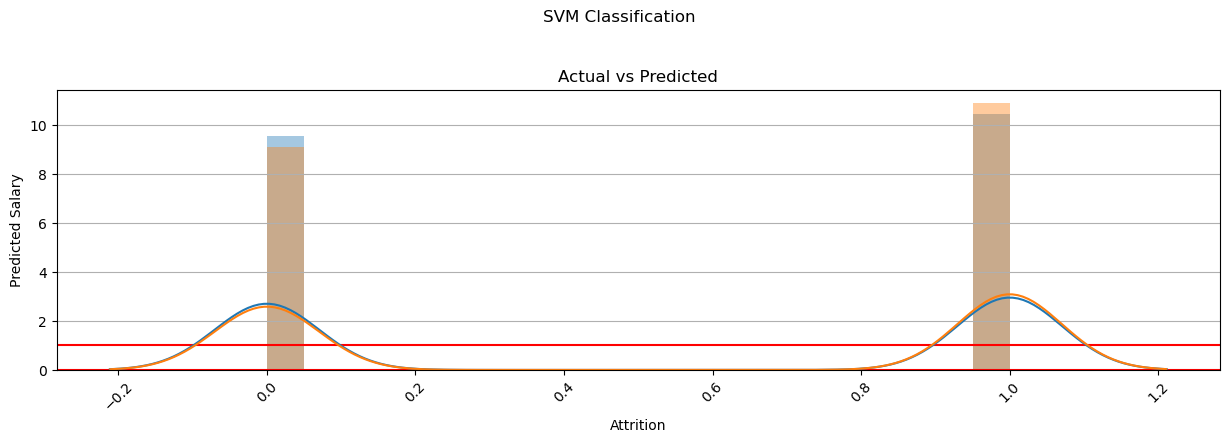

DecisionTree Classification : DecisionTreeClassifier()
Training score :  1.0
Testing score :  0.633724832214765
Mean absolute error :  0.3662751677852349
Mean squared error :  0.3662751677852349
Root mean squared error :  0.6052067149208069
R2 score :  -0.4679955521395074


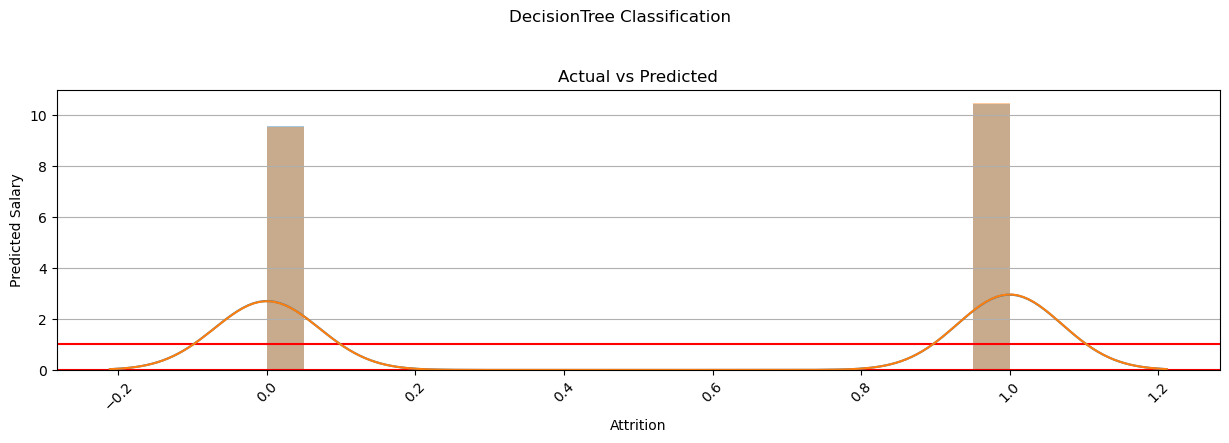

Randomforest Classification : RandomForestClassifier()
Training score :  1.0
Testing score :  0.7181208053691275
Mean absolute error :  0.28187919463087246
Mean squared error :  0.28187919463087246
Root mean squared error :  0.5309229648742578
R2 score :  -0.1297446301394285


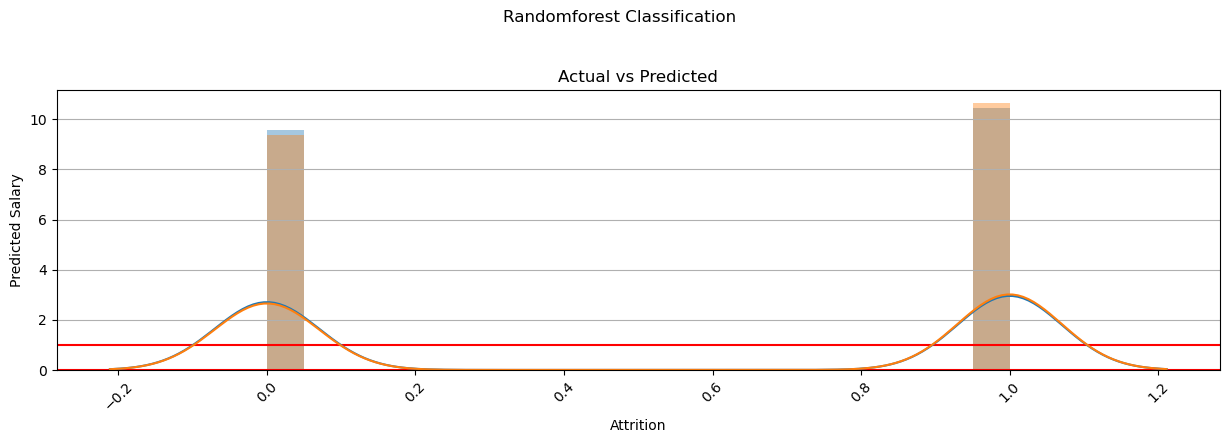

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,accuracy_score
import numpy as np
plot_step_size=15000
ytick_step_size=7500
c=str()
if "Date" in data.columns:
    c="Date"
else:
    c=data.columns[0]
if Reg_model_flag=="regression":    
    for regression_model_name,regression_model_reference in model_regression.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted")
        plt.xlabel(c)
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_test)
        plt.scatter(data[c].iloc[len(data)-len(y_test):],y_test)
        plt.scatter(data[c].iloc[len(data)-len(y_test):],y_pred)
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_pred)
        #plt.show()

        #plt.figure(figsize=[15,5])
        plt.subplot(2,1,2)
        plt.xticks(rotation=45)
        plt.axhline(max(y_test-y_pred),color="green")
        plt.axhline(0,color="red")
        plt.axhline(min(y_test-y_pred),color="green")
        plt.ylim(min(y_test-y_pred)-plot_step_size,max(y_test-y_pred)+plot_step_size)
        y_min, y_max = min(y_test-y_pred) - plot_step_size, max(y_test-y_pred) + plot_step_size
        plt.yticks(np.arange(y_min, y_max, ytick_step_size))  # Set stepping for y-axis
        plt.title(f"Rsiduals")
        plt.grid(axis='x')
        plt.grid(axis='y')        
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_test-y_pred)
        plt.tight_layout()
        plt.show() 
elif Reg_model_flag=="classification":
    # Inprogress
    for regression_model_name,regression_model_reference in model_Classify.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted")
        plt.xlabel("Dates")
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        #plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        sns.distplot(y_test,bins=20)
        sns.distplot(y_pred,bins=20)
        #sns.distplot(data[c],y_test)
        #sns.distplot(data[c],y_pred)
        #plt.plot(data[c].iloc[len(data)-len(y_test):],y_test)
        #plt.scatter(data[c].iloc[len(data)-len(y_test):],y_test)
        #plt.scatter(data[c].iloc[len(data)-len(y_test):],y_pred)
        #plt.plot(data[c].iloc[len(data)-len(y_test):],y_pred)
        plt.show()
else:
    pass
